In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

## 1. Data pre-processing

In [3]:
class Num_Transformer(object):

    def fit(self,X,y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000
        df["weight"] = X["weight"].map(lambda x: x if type(x)==float else float(x.split(" ")[0])*1000+float(x.split(" ")[2]))
        df["height"] = X["height"].str.strip(" meters").astype(float)
        df["width"] = X["width"].str.strip(" cm").astype(float)
        df["depth"] = X["depth"].str.strip(" cm").astype(float)
        self.means = df.mean()
    
    def transform(self,X,y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000
        df["weight"] = X["weight"].map(lambda x: x if type(x)==float else float(x.split(" ")[0])*1000+float(x.split(" ")[2]))
        df["height"] = X["height"].str.strip(" meters").astype(float)
        df["width"] = X["width"].str.strip(" cm").astype(float)
        df["depth"] = X["depth"].str.strip(" cm").astype(float)
        return df.fillna(self.means)
    
    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [5]:
steps = [('ntf', Num_Transformer()),
         ('rescale', MinMaxScaler())]
model = Pipeline(steps)

In [6]:
df = model.fit_transform(df)

In [7]:
df

array([[0.35031847, 0.30872483, 0.58888889, 0.30434783, 0.33333333],
       [0.176468  , 0.26845638, 0.53888889, 0.32608696, 0.33333333],
       [0.28343949, 0.27516779, 0.72222222, 0.2173913 , 0.16666667],
       ...,
       [0.176468  , 0.30201342, 0.63333333, 0.2826087 , 0.25      ],
       [0.04352442, 0.2147651 , 0.45555556, 0.36956522, 0.33333333],
       [0.13269639, 0.23489933, 0.7       , 0.19565217, 0.16666667]])

## 2. PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df)

In [10]:
df_pca

array([[-7.86602072e-02,  1.39935677e-01,  1.13296208e-01,
         3.22659079e-02, -1.48342036e-02],
       [-4.80201708e-02, -1.65752927e-02,  1.78382526e-02,
         1.68878556e-02, -8.92445009e-03],
       [-3.07464531e-01,  9.27770758e-02,  8.01450224e-02,
        -1.36135847e-02,  1.57694662e-02],
       ...,
       [-1.72866442e-01,  2.42559640e-02, -1.07531260e-02,
        -9.01542992e-03,  2.83998946e-03],
       [ 1.57882326e-02, -1.63537173e-01, -3.33083718e-02,
        -1.45528346e-02,  1.92686639e-03],
       [-3.16625349e-01, -4.33696007e-02,  5.94055427e-06,
        -5.35248337e-03,  1.58879904e-03]])

In [11]:
pca.explained_variance_ratio_

array([0.58234386, 0.26898479, 0.14202916, 0.00539552, 0.00124666])

Text(0, 0.5, 'Explained Variance')

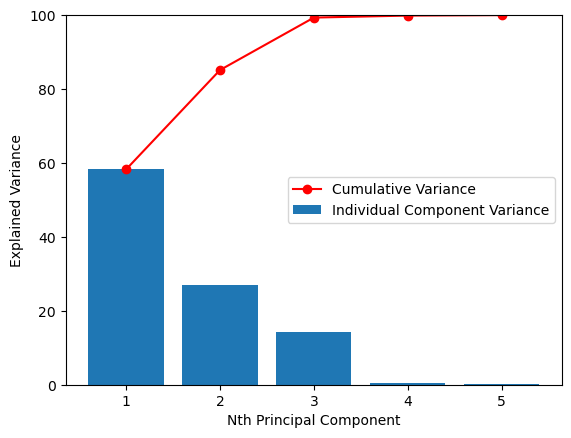

In [12]:
plt.bar(range(1,pca.n_components_+1), height = 100*pca.explained_variance_ratio_, label="Individual Component Variance")
plt.plot(range(1,pca.n_components_+1), np.cumsum(100*pca.explained_variance_ratio_), 'o-', color='red', label="Cumulative Variance")
plt.legend()
plt.ylim(0,100)
plt.xlabel("Nth Principal Component")
plt.ylabel("Explained Variance")

The following process demonstares how the transformation matrix (the basic vectors of the principle components) transforms the original features to the principal components.

In [13]:
new_basic_vectors = pca.components_
new_basic_vectors

array([[ 4.70585324e-02,  1.09426325e-01, -6.30927329e-01,
         5.37337379e-01,  5.46818636e-01],
       [ 6.65739565e-01,  6.56065069e-01,  3.28505605e-01,
         9.53202179e-02,  9.67862604e-02],
       [ 7.44698580e-01, -5.93214538e-01, -2.54100048e-01,
        -1.18891100e-01, -1.21731710e-01],
       [ 5.89287984e-04, -2.91684548e-01,  4.21159081e-01,
        -2.74313487e-01,  8.13816267e-01],
       [-5.75686534e-05, -3.47305545e-01,  5.02068688e-01,
         7.82815185e-01, -1.20441991e-01]])

In [14]:
np.dot(df-np.mean(df, axis=0), new_basic_vectors.T)

array([[-7.86602072e-02,  1.39935677e-01,  1.13296208e-01,
         3.22659079e-02, -1.48342036e-02],
       [-4.80201708e-02, -1.65752927e-02,  1.78382526e-02,
         1.68878556e-02, -8.92445009e-03],
       [-3.07464531e-01,  9.27770758e-02,  8.01450224e-02,
        -1.36135847e-02,  1.57694662e-02],
       ...,
       [-1.72866442e-01,  2.42559640e-02, -1.07531260e-02,
        -9.01542992e-03,  2.83998946e-03],
       [ 1.57882326e-02, -1.63537173e-01, -3.33083718e-02,
        -1.45528346e-02,  1.92686639e-03],
       [-3.16625349e-01, -4.33696007e-02,  5.94055427e-06,
        -5.35248337e-03,  1.58879904e-03]])

## 3. SVD

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
svd = TruncatedSVD(n_components=5)
df_svd = svd.fit_transform(df)

In [17]:
df_svd

array([[ 0.85603246, -0.09628705,  0.15556993, -0.03343355,  0.0343556 ],
       [ 0.77921622, -0.05061398, -0.00740012, -0.03053114,  0.01811676],
       [ 0.80018385, -0.31819144,  0.09808363, -0.03317771, -0.02087571],
       ...,
       [ 0.79583072, -0.17990978, -0.00509658,  0.00334753, -0.00897783],
       [ 0.69537819,  0.02890668, -0.12910324, -0.04460557, -0.01396846],
       [ 0.7263554 , -0.31369206, -0.04199146, -0.03237973, -0.00608057]])

In [18]:
svd.explained_variance_ratio_

array([0.1578503 , 0.57495157, 0.17663807, 0.08676654, 0.00379353])

Text(0, 0.5, 'Explained Variance')

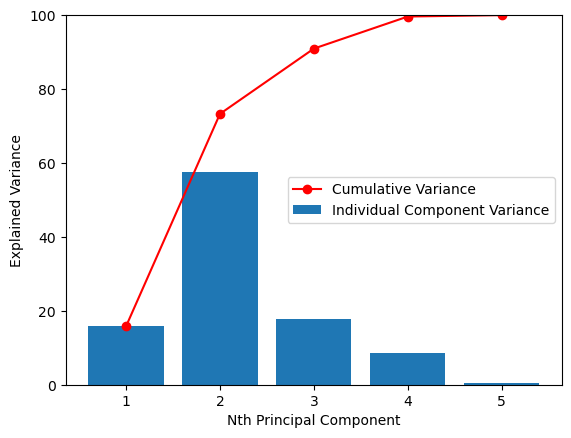

In [19]:
plt.bar(range(1,len(svd.explained_variance_ratio_)+1), height = 100*svd.explained_variance_ratio_, label="Individual Component Variance")
plt.plot(range(1,len(svd.explained_variance_ratio_)+1), np.cumsum(100*svd.explained_variance_ratio_), 'o-', color='red', label="Cumulative Variance")
plt.legend()
plt.ylim(0,100)
plt.xlabel("Nth Principal Component")
plt.ylabel("Explained Variance")

In [20]:
VT = svd.components_
VT

array([[ 2.27834396e-01,  3.83451216e-01,  6.34280347e-01,
         4.57602687e-01,  4.35137766e-01],
       [-3.65684589e-03,  3.19859532e-02, -7.13928570e-01,
         4.88930123e-01,  5.00216812e-01],
       [ 9.54918218e-01,  9.16536116e-02, -1.97953986e-01,
        -1.45544872e-01, -1.39146409e-01],
       [-1.90287000e-01,  9.18445233e-01, -2.20198194e-01,
        -1.93412141e-01, -1.85347542e-01],
       [ 4.13121513e-04,  1.83776142e-04,  1.79280121e-02,
        -7.02107933e-01,  7.11844668e-01]])

The following process demonstares how the decomposition process is conducted and how to get the transformed matrix.

In [21]:
U, S, Vh = np.linalg.svd(df, full_matrices=False)

In [22]:
U

array([[-0.01870967, -0.00778446,  0.02264518, -0.00691214,  0.03419947],
       [-0.01703076, -0.00409196, -0.00107718, -0.00631209,  0.01803443],
       [-0.01748903, -0.02572464,  0.01427732, -0.00685925, -0.02078084],
       ...,
       [-0.01739389, -0.01454506, -0.00074187,  0.00069208, -0.00893703],
       [-0.01519837,  0.002337  , -0.01879261, -0.00922187, -0.01390498],
       [-0.01587542, -0.02536088, -0.00611239, -0.00669427, -0.00605293]])

In [23]:
S

array([45.75347448, 12.36913314,  6.8698929 ,  4.83693153,  1.00456538])

In [24]:
Vh

array([[-2.27834396e-01, -3.83451216e-01, -6.34280347e-01,
        -4.57602687e-01, -4.35137766e-01],
       [-3.65684589e-03,  3.19859532e-02, -7.13928570e-01,
         4.88930123e-01,  5.00216812e-01],
       [ 9.54918218e-01,  9.16536116e-02, -1.97953986e-01,
        -1.45544872e-01, -1.39146409e-01],
       [-1.90287000e-01,  9.18445233e-01, -2.20198194e-01,
        -1.93412141e-01, -1.85347542e-01],
       [ 4.13121513e-04,  1.83776142e-04,  1.79280121e-02,
        -7.02107933e-01,  7.11844668e-01]])

In [25]:
U.shape, S.shape, Vh.shape

((3197, 5), (5,), (5, 5))

In [26]:
np.allclose(df, np.dot(U*S, Vh))

True

In [27]:
np.allclose(df, np.dot(np.dot(U, np.diag(S)), Vh))

True

In [28]:
np.allclose(df, np.dot(U, np.dot(np.diag(S), Vh)))

True

In [29]:
np.dot(U, np.diag(S))

array([[-0.85603246, -0.09628705,  0.15556993, -0.03343355,  0.0343556 ],
       [-0.77921622, -0.05061398, -0.00740012, -0.03053114,  0.01811676],
       [-0.80018385, -0.31819144,  0.09808363, -0.03317771, -0.02087571],
       ...,
       [-0.79583072, -0.17990978, -0.00509658,  0.00334753, -0.00897783],
       [-0.69537819,  0.02890668, -0.12910324, -0.04460557, -0.01396846],
       [-0.7263554 , -0.31369206, -0.04199146, -0.03237973, -0.00608057]])

In [30]:
import scipy

In [31]:
U, S, Vh = scipy.linalg.svd(df, full_matrices=False)

In [32]:
U

array([[-0.01870967, -0.00778446,  0.02264518, -0.00691214,  0.03419947],
       [-0.01703076, -0.00409196, -0.00107718, -0.00631209,  0.01803443],
       [-0.01748903, -0.02572464,  0.01427732, -0.00685925, -0.02078084],
       ...,
       [-0.01739389, -0.01454506, -0.00074187,  0.00069208, -0.00893703],
       [-0.01519837,  0.002337  , -0.01879261, -0.00922187, -0.01390498],
       [-0.01587542, -0.02536088, -0.00611239, -0.00669427, -0.00605293]])

In [33]:
S

array([45.75347448, 12.36913314,  6.8698929 ,  4.83693153,  1.00456538])

In [34]:
Vh

array([[-2.27834396e-01, -3.83451216e-01, -6.34280347e-01,
        -4.57602687e-01, -4.35137766e-01],
       [-3.65684589e-03,  3.19859532e-02, -7.13928570e-01,
         4.88930123e-01,  5.00216812e-01],
       [ 9.54918218e-01,  9.16536116e-02, -1.97953986e-01,
        -1.45544872e-01, -1.39146409e-01],
       [-1.90287000e-01,  9.18445233e-01, -2.20198194e-01,
        -1.93412141e-01, -1.85347542e-01],
       [ 4.13121513e-04,  1.83776142e-04,  1.79280121e-02,
        -7.02107933e-01,  7.11844668e-01]])

In [35]:
U.shape, S.shape, Vh.shape

((3197, 5), (5,), (5, 5))

In [36]:
np.allclose(df, np.dot(U*S, Vh))

True

In [37]:
np.allclose(df, np.dot(np.dot(U, np.diag(S)), Vh))

True

In [38]:
np.allclose(df, np.dot(U, np.dot(np.diag(S), Vh)))

True

In [39]:
np.dot(U, np.diag(S))

array([[-0.85603246, -0.09628705,  0.15556993, -0.03343355,  0.0343556 ],
       [-0.77921622, -0.05061398, -0.00740012, -0.03053114,  0.01811676],
       [-0.80018385, -0.31819144,  0.09808363, -0.03317771, -0.02087571],
       ...,
       [-0.79583072, -0.17990978, -0.00509658,  0.00334753, -0.00897783],
       [-0.69537819,  0.02890668, -0.12910324, -0.04460557, -0.01396846],
       [-0.7263554 , -0.31369206, -0.04199146, -0.03237973, -0.00608057]])

If truncate the first 4 singular values.

In [40]:
U_truncated = U[:,:4]
U_truncated

array([[-0.01870967, -0.00778446,  0.02264518, -0.00691214],
       [-0.01703076, -0.00409196, -0.00107718, -0.00631209],
       [-0.01748903, -0.02572464,  0.01427732, -0.00685925],
       ...,
       [-0.01739389, -0.01454506, -0.00074187,  0.00069208],
       [-0.01519837,  0.002337  , -0.01879261, -0.00922187],
       [-0.01587542, -0.02536088, -0.00611239, -0.00669427]])

In [41]:
S_truncated = S[:4]
S_truncated

array([45.75347448, 12.36913314,  6.8698929 ,  4.83693153])

In [42]:
np.dot(U_truncated, np.diag(S_truncated))

array([[-0.85603246, -0.09628705,  0.15556993, -0.03343355],
       [-0.77921622, -0.05061398, -0.00740012, -0.03053114],
       [-0.80018385, -0.31819144,  0.09808363, -0.03317771],
       ...,
       [-0.79583072, -0.17990978, -0.00509658,  0.00334753],
       [-0.69537819,  0.02890668, -0.12910324, -0.04460557],
       [-0.7263554 , -0.31369206, -0.04199146, -0.03237973]])